# **Advanced Data Preprocessing Exercises**
This notebook contains 10  exercises based on the preprocessing concepts covered in the provided course PDF and the `pokemon.csv` dataset. Each exercise focuses on advanced data preprocessing techniques, including data cleaning, feature engineering, and transformations.

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('pokemon.csv')

## **Exercise 1: Handling Missing Values**
Some columns in the dataset might have missing values. Your task is to:
- Identify columns with missing values.
- Implement an appropriate strategy to handle missing values (imputation, deletion, etc.).

In [4]:
# Identify missing values
print("Missing values per column: ", df.isnull().sum())


Missing values per column:  abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             

## **Exercise 2: Detecting and Handling Outliers**
Outliers can impact the performance of machine learning models. Your task is to:
- Identify potential outliers using statistical methods (e.g., IQR, Z-score).
- Remove or transform the outliers appropriately.

In [5]:
# Detect outliers using IQR method
import numpy as np

Q1 = df['attack'].quantile(0.25)
Q3 = df['attack'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['attack'] < lower_bound) | (df['attack'] > upper_bound)]
print("Number of outliers in Attack:", outliers.shape[0])

df['attack'] = np.where(df['attack'] < lower_bound, lower_bound, df['attack'])
df['attack'] = np.where(df['attack'] > upper_bound, upper_bound, df['attack'])

Number of outliers in Attack: 5


## **Exercise 3: Feature Encoding**
Some columns may contain categorical values. Your task is to:
- Identify categorical columns.
- Apply appropriate encoding techniques (One-Hot Encoding, Label Encoding, etc.).

In [6]:
# Convert categorical variables to numeric using One-Hot Encoding
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Original shape:", df.shape)
print("Encoded shape:", df_encoded.shape)
print("Columns after encoding:", df_encoded.columns.tolist())

Categorical columns: ['abilities', 'capture_rate', 'classfication', 'japanese_name', 'name', 'type1', 'type2']
Original shape: (801, 41)
Encoded shape: (801, 2769)
Columns after encoding: ['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water', 'attack', 'base_egg_steps', 'base_happiness', 'base_total', 'defense', 'experience_growth', 'height_m', 'hp', 'percentage_male', 'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'generation', 'is_legendary', "abilities_['Aftermath', 'Unburden', 'Flare Boost']", "abilities_['Air Lock']", "abilities_['Anticipation', 'Dry Skin', 'Poison Touch']", "abilities_['Anticipation', 'Overcoat']", "abilities_['Aura Break', 'Power Construct']", "abilities_['Bad Dreams']", "abilities_['Battery'

## **Exercise 4: Scaling and Normalization**
Scaling numeric features is important to ensure equal importance in machine learning models. Your task is to:
- Apply Min-Max scaling and Standardization on the numerical features.
- Compare the results.

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Apply Min-Max scaling and Standardization on the numerical features.

numeric_cols =['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed','base_total']
df_minmax = df.copy()
df_std = df.copy()
minmax_scaler = MinMaxScaler()
df_minmax[numeric_cols] = minmax_scaler.fit_transform(df_minmax[numeric_cols])
std_scaler = StandardScaler()
df_std[numeric_cols] = std_scaler.fit_transform(df_std[numeric_cols])

#Compare the results
print("Min Max Scaling :", df_minmax[numeric_cols].describe())
print("Standard Scaling :", df_std[numeric_cols].describe())

Min Max Scaling :                hp      attack     defense   sp_attack  sp_defense       speed  \
count  801.000000  801.000000  801.000000  801.000000  801.000000  801.000000   
mean     0.267554    0.447906    0.302261    0.333184    0.242435    0.350483   
std      0.104630    0.196544    0.136752    0.175836    0.133060    0.165187   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.192913    0.307692    0.200000    0.190217    0.142857    0.228571   
50%      0.251969    0.430769    0.288889    0.298913    0.219048    0.342857   
75%      0.311024    0.584615    0.377778    0.440217    0.333333    0.457143   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       base_total  
count  801.000000  
mean     0.413962  
std      0.198673  
min      0.000000  
25%      0.233333  
50%      0.425000  
75%      0.541667  
max      1.000000  
Standard Scaling :                  hp        attack       defense     s

## **Exercise 5: Feature Selection**
Some features may be irrelevant or redundant. Your task is to:
- Apply correlation analysis to identify highly correlated features.
- Use feature selection techniques such as Mutual Information or Recursive Feature Elimination (RFE).

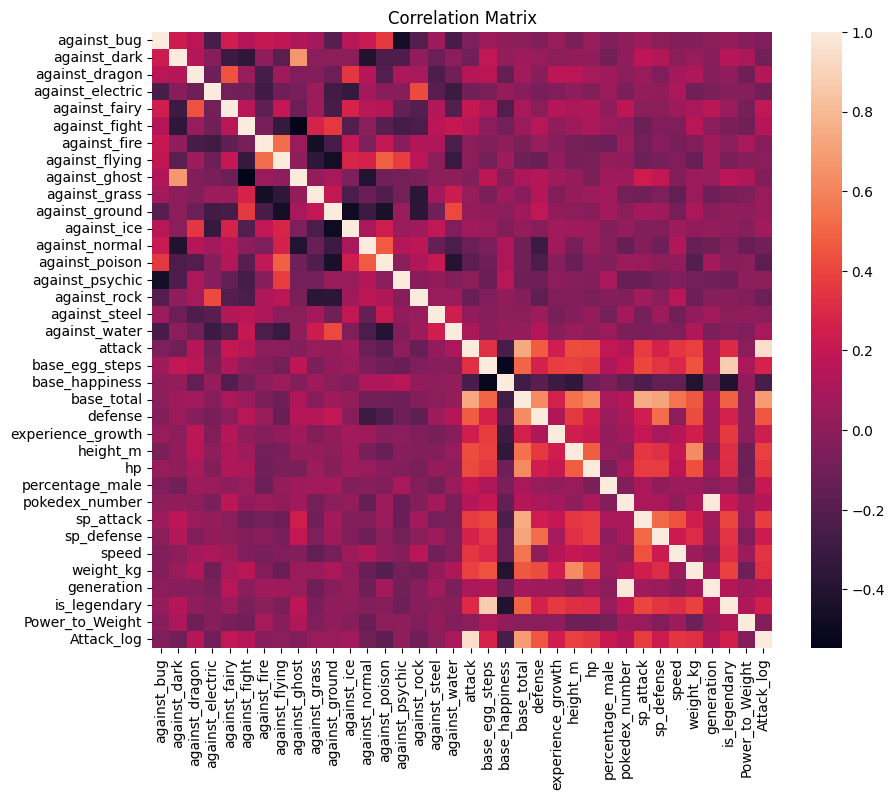

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix

corr_matrix = df.corr(numeric_only=True)

# Display the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix)
plt.title("Correlation Matrix")
plt.show()

## **Exercise 6: Creating New Features**
Feature engineering can enhance model performance. Your task is to:
- Create meaningful new features based on existing ones.
- Example: Compute a power-to-weight ratio for Pokémon.

In [9]:
# Create a new feature: Power-to-Weight Ratio
if 'weight_kg' in df.columns:
    df['Power_to_Weight'] = (df['attack'] + df['sp_attack']) / df['weight_kg']
    print(df[['attack', 'sp_attack', 'weight_kg', 'Power_to_Weight']].head())
else:
    print("Column Weight_kg not found.")


   attack  sp_attack  weight_kg  Power_to_Weight
0    49.0         65        6.9        16.521739
1    62.0         80       13.0        10.923077
2   100.0        122      100.0         2.220000
3    52.0         60        8.5        13.176471
4    64.0         80       19.0         7.578947


## **Exercise 7: Data Transformation**
Some features might need transformations for better model performance. Your task is to:
- Apply log transformation on skewed features.
- Apply polynomial feature expansion.

In [16]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Apply log transformation

df['Attack_log'] = np.log1p(df['attack'])

# Apply polynomial features
numeric_cols = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed','base_total']
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[numeric_cols].fillna(0))


## **Exercise 8: Handling Imbalanced Data**
Imbalanced classes can lead to biased models. Your task is to:
- Identify any class imbalance.
- Apply resampling techniques (Oversampling or Undersampling).

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# Check class distribution
if 'is_legendary' in df.columns:
    print("Class distribution in Legendary", df['is_legendary'].value_counts())

    numeric_cols = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed','base_total']
    X = df[numeric_cols].fillna(0)
    y = df['is_legendary']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    print("class distribution:", y_res.value_counts())


Class distribution in Legendary is_legendary
0    731
1     70
Name: count, dtype: int64
class distribution: is_legendary
0    588
1    588
Name: count, dtype: int64


## **Exercise 9: Applying PCA for Dimensionality Reduction**
Dimensionality reduction can help improve performance. Your task is to:
- Apply PCA and determine the number of components that explain 95% variance.

In [18]:
from sklearn.decomposition import PCA

#Apply PCA and determine the number of components that explain 95% variance.
numeric_cols = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed','base_total']
X = df[numeric_cols].fillna(0)
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=None)
pca.fit(X_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print("variance ratio:", pca.explained_variance_ratio_)
print("Cumulative variance:", cumulative_variance)
print("number of components for 95% variance:", n_components_95)


variance ratio: [5.26233566e-01 1.56359692e-01 1.12690278e-01 1.05189479e-01
 6.14345778e-02 3.80854150e-02 6.99151448e-06]
Cumulative variance: [0.52623357 0.68259326 0.79528354 0.90047302 0.96190759 0.99999301
 1.        ]
number of components for 95% variance: 5


## **Exercise 10: Building a Preprocessing Pipeline**
Automation is key in real-world projects. Your task is to:
- Build a preprocessing pipeline using `Pipeline` from `sklearn`.
- Integrate steps such as imputation, scaling, and encoding.

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Build a preprocessing pipeline using Pipeline from sklearn.
numeric_features = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'base_total']

categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('encoder', OneHotEncoder(drop='first'))
])

# Integrate the numeric and categorical transformers using a ColumnTransformer.
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

print(pipeline)





Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['hp', 'attack', 'defense',
                                                   'sp_attack', 'sp_defense',
                                                   'speed', 'base_total']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
        